In [121]:
import pandas as pd
data = pd.read_csv("./Data/merged.csv")

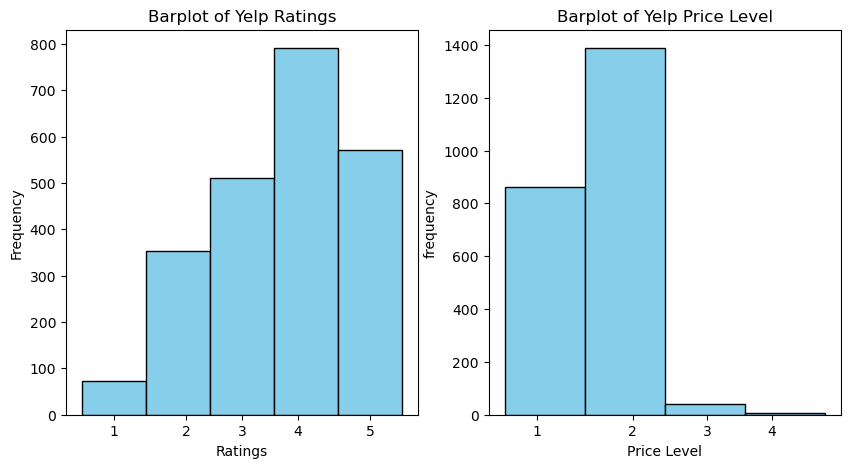

In [54]:

plt.show()

(array([  9.,  63., 152., 201., 200., 310., 409., 382., 412., 158.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

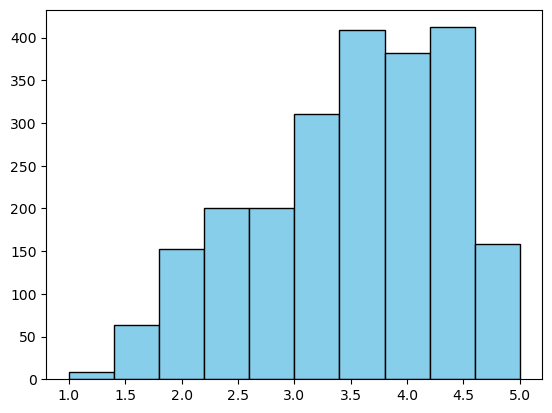

In [18]:
plt.hist(data['rating'], bins = 10, color="skyblue", edgecolor='black')

In [123]:
price_mapping = {
    '$': 1,
    '$$': 2,
    '$$$': 3,
    '$$$$': 4
}
data['price_level'] = data['price'].map(price_mapping)

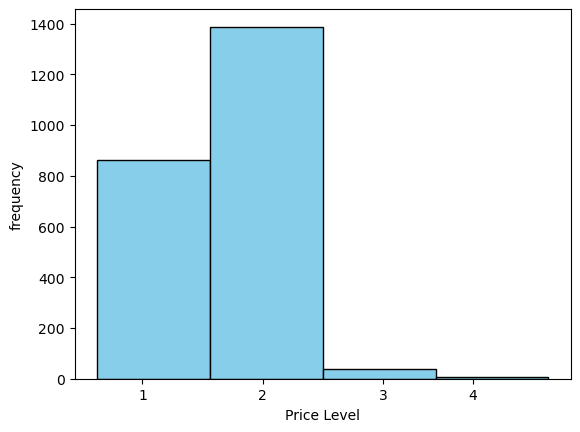

In [40]:
plt.hist(data['price_level'], bins = 4, color="skyblue", edgecolor='black')
plt.xlabel("Price Level")
plt.ylabel("frequency")
plt.xticks([1.3, 2.1, 2.9, 3.5], ['1',"2","3","4"])
plt.show()

In [10]:
data.columns

Index(['price', 'review_count', 'categories', 'lat', 'lon', 'display_address',
       'city', 'zip_code', 'phone', 'address', 'health codes', 'date', 'url',
       'num_health_code_violations'],
      dtype='object')

In [ ]:
fig,axs = plt.subplots(1,2,figsize = (10,5))
axs[0].hist(data['rating'], bins = 5, color="skyblue", edgecolor='black')
axs[0].set_xlabel('Ratings')
axs[0].set_xticks([1.4, 2.3, 3, 3.7 ,4.6], ['1',"2","3","4",5])
axs[0].set_ylabel('Frequency')
axs[0].set_title('Barplot of Yelp Ratings')

axs[1].hist(data['price_level'], bins = 4, color="skyblue", edgecolor='black')
axs[1].set_xlabel("Price Level")
axs[1].set_ylabel("frequency")
axs[1].set_xticks([1.3, 2.2, 2.9, 3.5], ['1',"2","3","4"])
axs[1].set_title('Barplot of Yelp Price Level')


In [122]:
data['categories'] = data['categories'].str.replace(r'\[|\]', '').str.split(', ')

C:\Users\sande\AppData\Local\Temp\ipykernel_25352\3905380502.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['categories'] = data['categories'].str.replace(r'\[|\]', '').str.split(', ')


In [124]:
data['categories']

0       ['Breakfast & Brunch', 'American', 'Southern']
1                   ['Bars', 'American', 'Sandwiches']
2                ['Japanese', 'Karaoke', 'Sushi Bars']
3                          ['Cajun/Creole', 'Seafood']
4                             ['Mexican', 'Fast Food']
                             ...                      
2291                ['Breakfast & Brunch', 'American']
2292                                       ['Mexican']
2293               ['New American', 'Bars', 'Karaoke']
2294                                     ['Breweries']
2295           ['Pizza', 'Chicken Wings', 'Fast Food']
Name: categories, Length: 2296, dtype: object

In [125]:
data_expanded = data.explode('categories').reset_index(drop=True)
data_expanded.head()

,Unnamed: 0,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url,num_health_code_violations,price_level
0,0,1000-cra,cracker-barrel-old-country-store-sacramento-2,Cracker Barrel Old Country Store,2.4,$$,1213,'Breakfast & Brunch',38.583935,-121.414518,"['1000 Howe Ave', 'Sacramento, CA 95825']",Sacramento,95825,1.916564e+10,"1000 Howe Ave Sacramento, CA 95825-3907",[['7']],"['April 21, 2023']",https://inspections.myhealthdepartment.com/sac...,7,2
1,0,1000-cra,cracker-barrel-old-country-store-sacramento-2,Cracker Barrel Old Country Store,2.4,$$,1213,'American',38.583935,-121.414518,"['1000 Howe Ave', 'Sacramento, CA 95825']",Sacramento,95825,1.916564e+10,"1000 Howe Ave Sacramento, CA 95825-3907",[['7']],"['April 21, 2023']",https://inspections.myhealthdepartment.com/sac...,7,2
2,0,1000-cra,cracker-barrel-old-country-store-sacramento-2,Cracker Barrel Old Country Store,2.4,$$,1213,'Southern',38.583935,-121.414518,"['1000 Howe Ave', 'Sacramento, CA 95825']",Sacramento,95825,1.916564e+10,"1000 Howe Ave Sacramento, CA 95825-3907",[['7']],"['April 21, 2023']",https://inspections.myhealthdepartment.com/sac...,7,2
3,1,1000-del,delta-bar-and-grill-sacramento,Delta Bar and Grill,3.2,$$,102,'Bars',38.582643,-121.506647,"['1000 Front St', 'Sacramento, CA 95814']",Sacramento,95814,1.916441e+10,"1000 Front St Sacramento, CA 95814-3231","[['1c', '6', '14a', '36', '41']]","['November 8, 2023']",https://inspections.myhealthdepartment.com/sac...,32,2
4,1,1000-del,delta-bar-and-grill-sacramento,Delta Bar and Grill,3.2,$$,102,'American',38.582643,-121.506647,"['1000 Front St', 'Sacramento, CA 95814']",Sacramento,95814,1.916441e+10,"1000 Front St Sacramento, CA 95814-3231","[['1c', '6', '14a', '36', '41']]","['November 8, 2023']",https://inspections.myhealthdepartment.com/sac...,32,2


In [67]:
import ast

Text(0.5, 0, '')

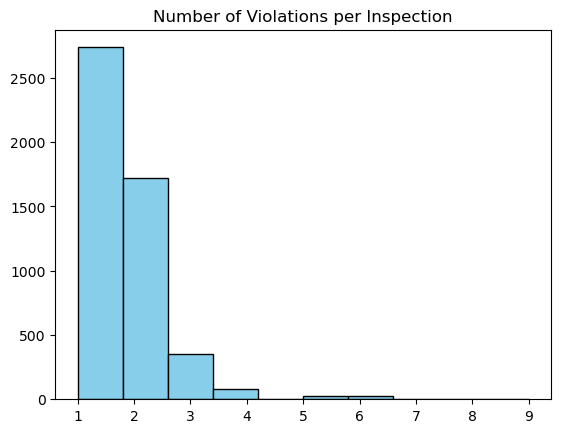

In [134]:
def count_elements(lst):
    lst = ast.literal_eval(lst)
    return sum(len(sublist) for sublist in lst)

def count_date(lst):
    lst = ast.literal_eval(lst)
    return(len(lst))
# Applying the function to 'health codes' column and creating a new column
data_expanded['health_codes_count'] = data_expanded['health codes'].apply(count_elements)
data_expanded['number_of_inspections'] = data_expanded['date'].apply(count_date)
data_expanded['violation_per_inspection'] = data_expanded['health_codes_count']/data_expanded['number_of_inspections']
plt.hist(data_expanded['number_of_inspections'], bins = 10, color = "skyblue", edgecolor = 'black')
plt.title("Number of Violations per Inspection")
plt.xlabel("")

In [128]:
result = data_expanded.groupby('categories').agg({
    'rating': 'mean',
    'price_level': 'mean',
    'number_of_inspections': 'mean',
    'violation_per_inspection':'mean',
    'review_count':'sum'
})

In [150]:
df =result.sort_values(by="review_count", ascending=False).head(20)


In [151]:
df.reset_index(inplace=True)
df

,categories,rating,price_level,number_of_inspections,violation_per_inspection,review_count
0,'Breakfast & Brunch',3.471084,1.674699,1.542169,5.556727,92258
1,'American',3.445185,1.881481,1.444444,5.940741,65882
2,'New American',3.920833,2.125000,1.583333,5.721065,59607
3,'Mexican',3.265196,1.426471,1.642157,5.610703,58262
4,'Sandwiches',3.310638,1.421277,1.527660,4.506738,55818
5,'Burgers',2.688837,1.381395,1.600000,4.322093,54313
6,'Seafood',3.794382,1.943820,1.550562,6.470037,49322
7,'Coffee & Tea',3.378879,1.482759,1.487069,4.262213,47962
8,'Sushi Bars',3.894444,1.988889,1.422222,5.692593,47726
9,'Pizza',3.297087,1.674757,1.577670,4.749191,46464


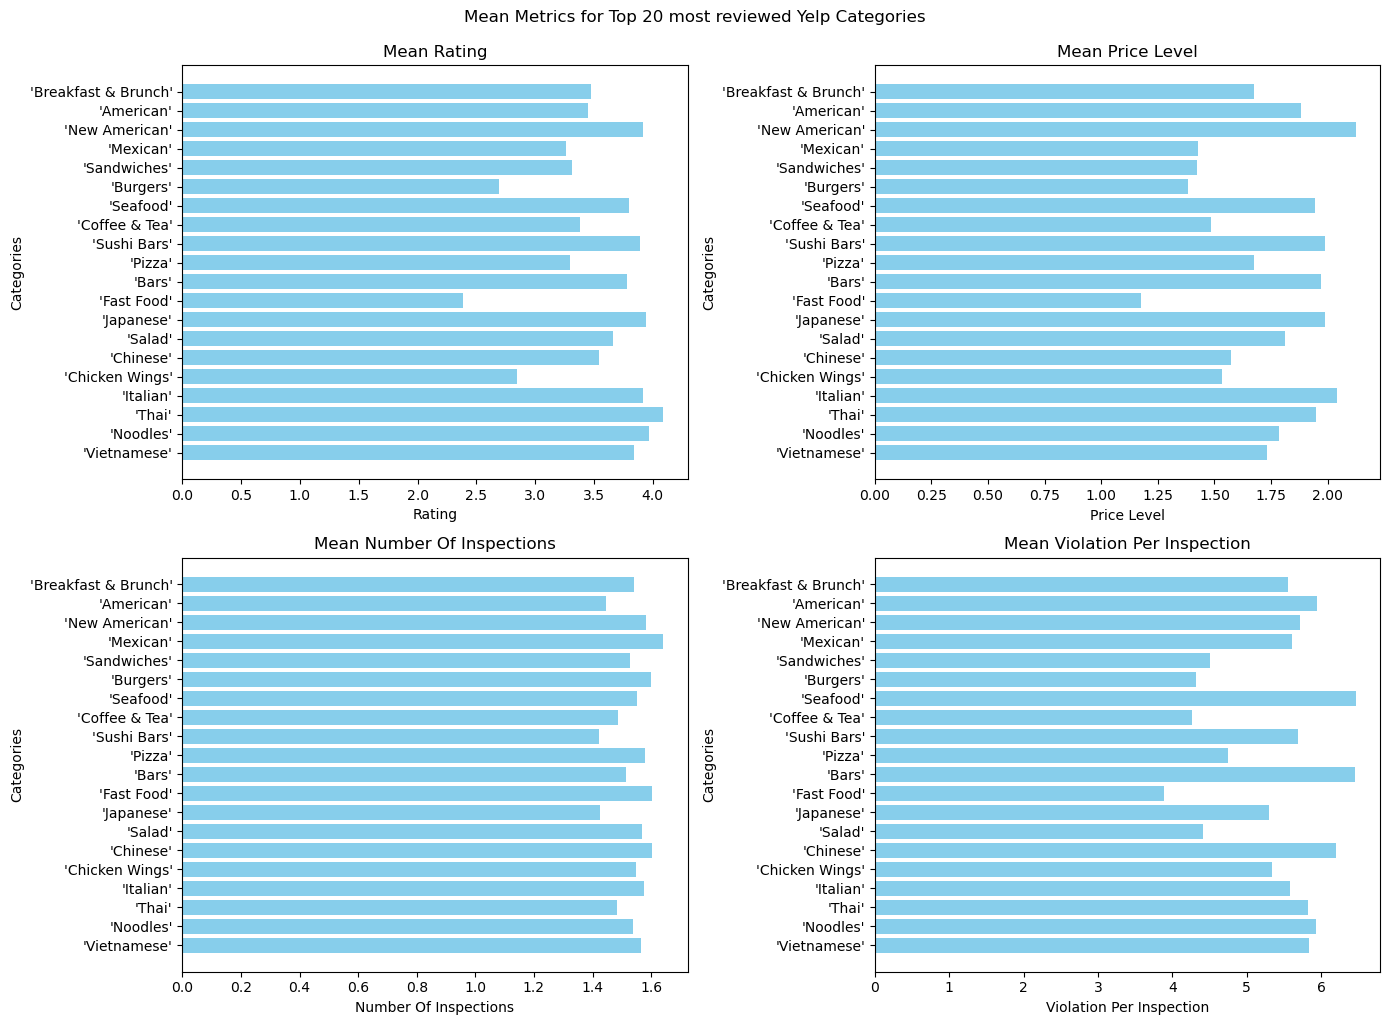

In [157]:
columns_to_plot = ['rating', 'price_level', 'number_of_inspections', 'violation_per_inspection']

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easy iteration
axs = axs.flatten()

# Plot each column in a horizontal bar plot
for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    ax.barh(df['categories'], df[column], color='skyblue')
    ax.set_xlabel(column.replace('_', ' ').title())
    ax.set_ylabel('Categories')
    ax.set_title(f'Mean {column.replace("_", " ").title()}')
    ax.invert_yaxis()  # Invert y-axis for better readability

# Adjust layout
plt.tight_layout()
plt.suptitle("Mean Metrics for Top 20 most reviewed Yelp Categories", y =1.02)
# Show the plot
plt.show()